#### Preprocessing the Data and EDA about the carbon emission rights 
#### Code execution environment in R 4.1.0 
###### Execute files downloaded from the "KRX배출권시장 정보플랫폼" & "NGMS국가온실가스 종합관리 시스템" 
###### Information data by date of carbon emission rights from January 1, 2019 to July 15, 2022 
###### Statements on greenhouse gas emissions and energy usage by company from 2018 to 2020 


# Load the library 

In [18]:
library(moments)
library(lubridate)
library(gridExtra)
library(corrplot)
library(class)
library(readxl)
library(dplyr)
library(ggplot2)
library(tidyverse)
library(purrr)
library(data.table)


Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ tibble  2.1.1     √ purrr   0.3.2
√ tidyr   0.8.3     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x lubridate::as.difftime() masks base::as.difftime()
x dplyr::combine()         masks gridExtra::combine()
x lubridate::date()        m

# chapter 1. Preprocessing the Statements data for EDA

## Load the data file 

In [5]:
setwd("C:/0625/0712")   
getwd() 

[1] "C:/0625/0712"

In [8]:
sta_2018 <- read_excel("2018년도 업체별 명세서 주요정보(업데이트)_19.08.08.기준.xls",sheet = 2)
sta_2019 <- read_excel("2019년도 업체별 명세서 주요정보(업데이트)_20.11.26.기준(수정).xlsx",sheet = 2)
sta_2020 <- read_excel("1. 2020년도 업체별 명세서 주요정보(업데이트)_21.12.30_기준.xlsx",sheet = 3)


New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ... and 4 more problems
New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ... and 4 more problems
New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ... and 4 more problems


## preprocessing the data file

In [10]:
colnames(sta_2018) <- sta_2018[2,]
colnames(sta_2019) <- sta_2019[2,]
colnames(sta_2020) <- sta_2020[2,]

## feature delete 

In [11]:
sta_2018 <- as.data.frame(sta_2018[3:nrow(sta_2018),-c(1,2,5,9,10)])
sta_2019 <- as.data.frame(sta_2019[3:nrow(sta_2019),-c(1,2,5,9,10)])
sta_2020 <- as.data.frame(sta_2020[3:nrow(sta_2020),-c(1,4,5,6,10)])

## data type transform 

In [14]:
sta_2018$`온실가스 배출량(tCO2)` <- as.numeric(sta_2018$`온실가스 배출량(tCO2)`)
sta_2019$`온실가스 배출량(tCO2-eq)` <- as.numeric(sta_2019$`온실가스 배출량(tCO2-eq)`)
sta_2020$`온실가스 배출량(tCO2-eq)` <- as.numeric(sta_2020$`온실가스 배출량(tCO2-eq)`)

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"

## NA delete

In [15]:
sta_2018[!complete.cases(sta_2018),]
sta_2019[!complete.cases(sta_2019),]
sta_2020[!complete.cases(sta_2020),]

,관리업체,대상연도,지정업종,온실가스 배출량(tCO2),에너지 사용량(TJ)
139,대구텍 유한회사,2018,비철금속,NA,*****


,관리업체,대상연도,지정업종,온실가스 배출량(tCO2-eq),에너지 사용량(TJ)
334,대구텍 유한책임회사,2019,비철금속,NA,*****


,관리업체,대상연도,계획업종,온실가스 배출량(tCO2-eq),에너지 사용량(TJ)
189,대구텍 유한책임회사,2020,1차 비철금속 제조업,NA,NA
613,NA,NA,NA,NA,NA
614,NA,NA,NA,NA,NA
615,NA,NA,NA,NA,NA
616,NA,NA,NA,NA,NA


In [16]:
sta_2018 <- na.omit(sta_2018)
sta_2019 <- na.omit(sta_2019)
sta_2020 <- na.omit(sta_2020)

## Grouping of company by industry

In [19]:
sta1 <- sta_2018 %>% group_by(지정업종) %>% summarise(sum_emission2018 = sum(`온실가스 배출량(tCO2)`))
sta2 <- sta_2019 %>% group_by(지정업종) %>% summarise(sum_emission2019 = sum(`온실가스 배출량(tCO2-eq)`))
sta3 <- sta_2020 %>% group_by(계획업종) %>% summarise(sum_emission2020 = sum(`온실가스 배출량(tCO2-eq)`))

## Visualization

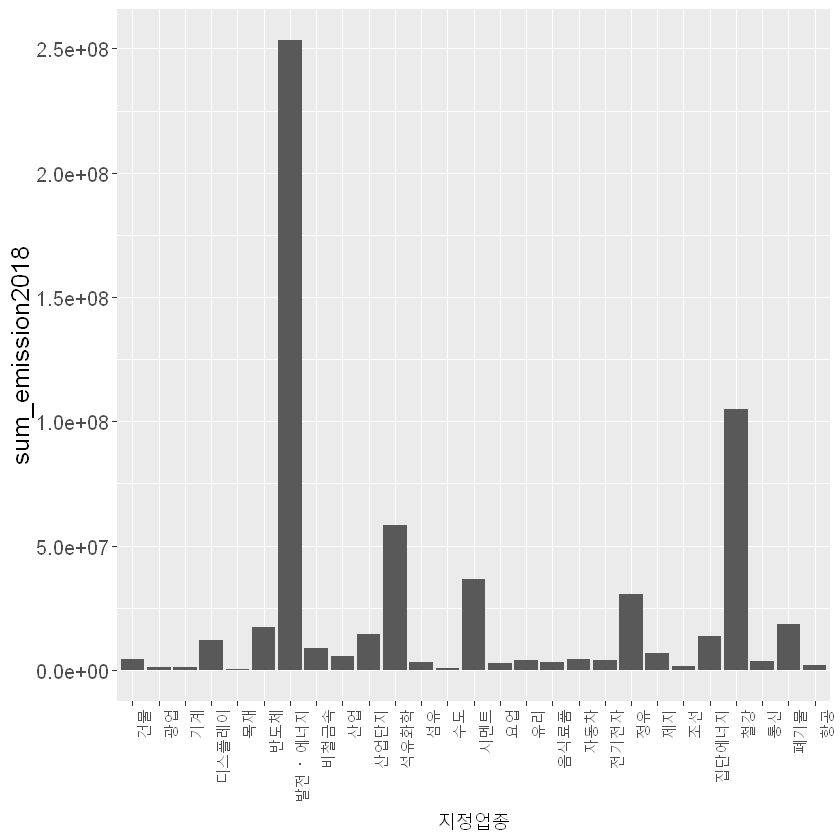

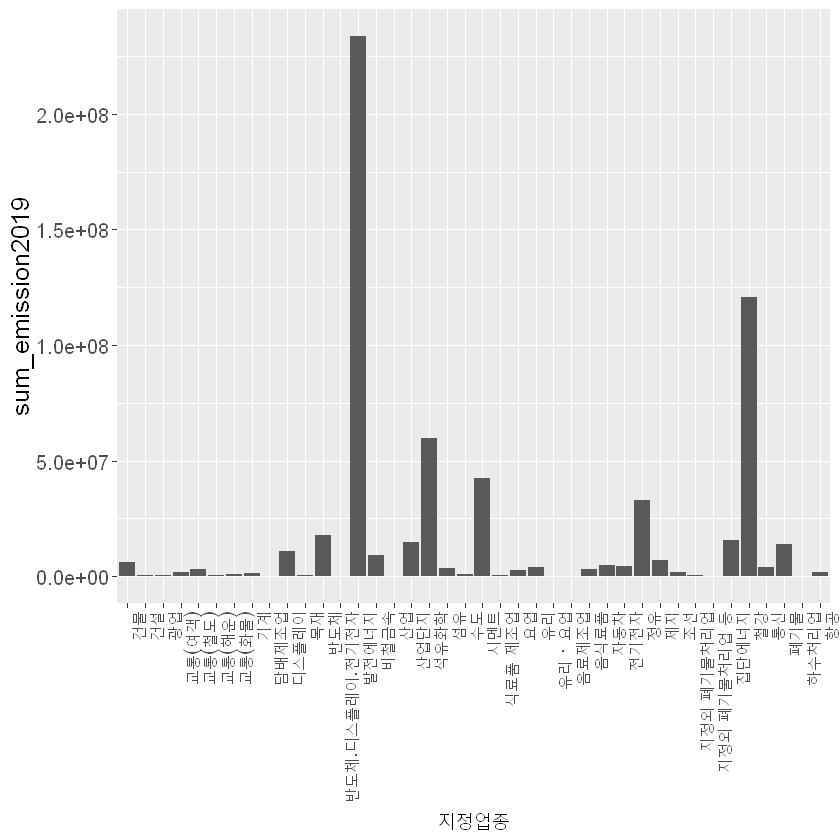

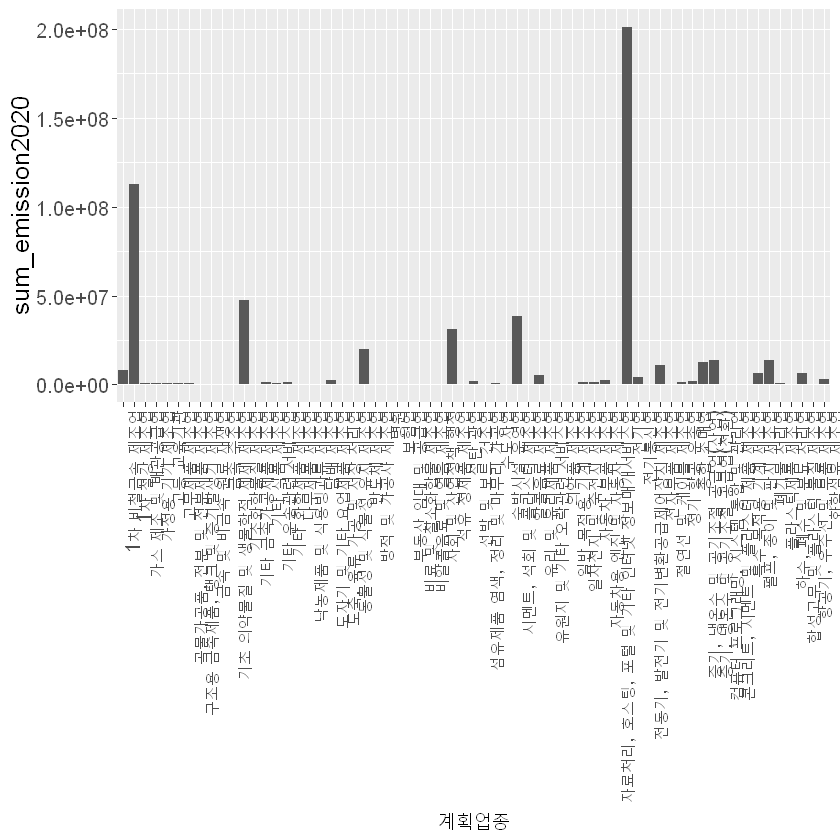

In [20]:
ggplot(data = sta1, aes(x=지정업종, y=sum_emission2018))+geom_col()+theme(text = element_text(size = 15),
                                                                            axis.text.x = element_text(angle=90, hjust=1))
ggplot(data = sta2, aes(x=지정업종, y=sum_emission2019))+geom_col()+theme(text = element_text(size = 15),
                                                                            axis.text.x = element_text(angle=90, hjust=1))
ggplot(data = sta3, aes(x=계획업종, y=sum_emission2020))+geom_col()+theme(text = element_text(size = 15),
                                                                            axis.text.x = element_text(angle=90, hjust=1))

## Percentage of the main 3 groups

In [22]:
1-((sum(sta1$sum_emission2018) - sum(sta1[c(7,11,24),c(2)]))/sum((sta1$sum_emission2018))) # Power generation energy, petrochemical, steel
1-((sum(sta2$sum_emission2019) - sum(sta2[c(14,18,36),c(2)]))/sum((sta2$sum_emission2019)))# Power generation energy, petrochemical, steel
1-((sum(sta3$sum_emission2020) - sum(sta3[c(2,12,47),c(2)]))/sum((sta3$sum_emission2020))) # electronic energy, manufacturing of basic chemicals, steel


[1] 0.6765522

[1] 0.6602247

[1] 0.6423942

# chapter 2. preprocessing Carbon Emissions Trading Data

## Load the data

In [24]:
tra1 <- read.csv("data.csv",header = TRUE, stringsAsFactors = F)
tra2 <- read.csv("data (1).csv",header = TRUE, stringsAsFactors = F)
tra3 <- read.csv("data (2).csv",header = TRUE, stringsAsFactors = F)
tra4 <- read.csv("data (3).csv",header = TRUE, stringsAsFactors = F)
tra5 <- read.csv("data (4).csv",header = TRUE, stringsAsFactors = F)

## merge and data type transform 

In [25]:
tra_a <- rbind(tra1,tra2,tra3,tra4,tra5)
tra_a$일자 <- as.Date(tra_a$일자, "%Y-%m-%d")
tra_a$종가 <- gsub(",","",tra_a$종가)
tra_a$종가 <- as.numeric(tra_a$종가)
tra_a$거래량 <- gsub(",","",tra_a$거래량)
tra_a$거래량 <- as.numeric(tra_a$거래량)

## Check the NA

In [27]:
tra_a[!complete.cases(tra_a),]

일자,종목명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균


## Sort the data

In [28]:
tra_a <- as.data.frame(as.data.table(tra_a[c(order(tra_a$일자, decreasing = FALSE)),]))
str(tra_a)

'data.frame':	7722 obs. of  11 variables:
 $ 일자    : Date, format: "2018-01-02" "2018-01-02" ...
 $ 종목명  : chr  "KAU17" "KAU18" "KCU17" "KOC" ...
 $ 종가    : num  20000 20000 20800 24000 20000 20000 20800 24000 20000 20000 ...
 $ 대비    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ 등락률  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 시가    : chr  "0" "0" "0" "0" ...
 $ 고가    : chr  "0" "0" "0" "0" ...
 $ 저가    : chr  "0" "0" "0" "0" ...
 $ 거래량  : num  0 0 0 0 26000 0 0 0 0 0 ...
 $ 거래대금: chr  "0" "0" "0" "0" ...
 $ 가중평균: chr  "0" "0" "0" "0" ...


## Extracting KAU only# Extracting KAU only

In [29]:
tra_a <- tra_a[grep("KAU",tra_a$종목명),]

## visualization

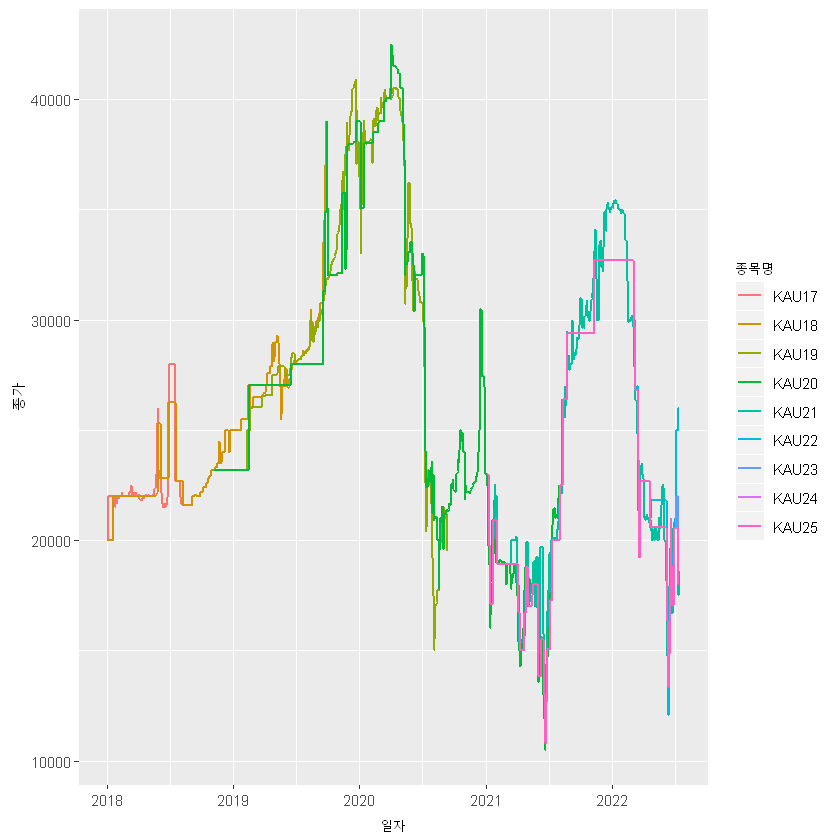

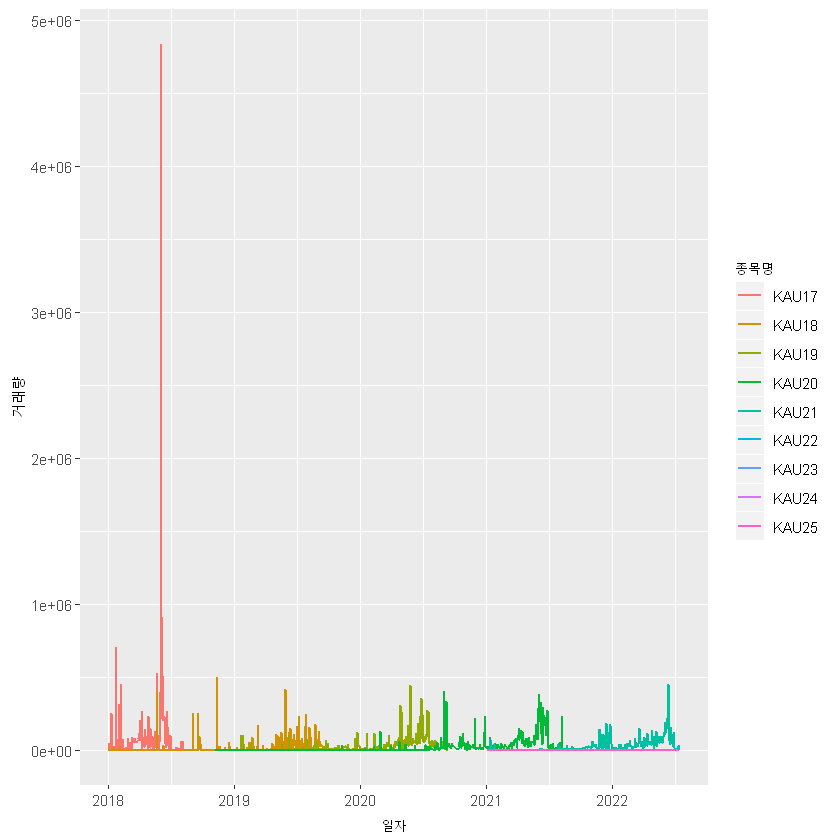

In [31]:
ggplot(data = tra_a, aes(x=일자, y=종가, group=종목명, color = 종목명))+geom_line(cex = 0.8)
ggplot(data = tra_a, aes(x=일자, y=거래량, group=종목명, color = 종목명))+geom_line(cex = 0.8)


## Grouping the data by item name

In [32]:
tra_18 <- tra_a %>% filter(종목명 == "KAU18")
tra_19 <- tra_a %>% filter(종목명 == "KAU19")
tra_20 <- tra_a %>% filter(종목명 == "KAU20")
tra_21 <- tra_a %>% filter(종목명 == "KAU21")
tra_22 <- tra_a %>% filter(종목명 == "KAU22")
tra_23 <- tra_a %>% filter(종목명 == "KAU23")
tra_24 <- tra_a %>% filter(종목명 == "KAU24")
tra_25 <- tra_a %>% filter(종목명 == "KAU25")

## visualization

In [33]:
az <- ggplot(data = tra_18, aes(x=일자, y=종가))+geom_line(cex = 0.8)
bz <- ggplot(data = tra_19, aes(x=일자, y=종가))+geom_line(cex = 0.8)
cz <- ggplot(data = tra_20, aes(x=일자, y=종가))+geom_line(cex = 0.8)
dz <- ggplot(data = tra_21, aes(x=일자, y=종가))+geom_line(cex = 0.8)
ez <- ggplot(data = tra_22, aes(x=일자, y=종가))+geom_line(cex = 0.8)
fz <- ggplot(data = tra_23, aes(x=일자, y=종가))+geom_line(cex = 0.8)
gz <- ggplot(data = tra_24, aes(x=일자, y=종가))+geom_line(cex = 0.8)
hz <- ggplot(data = tra_25, aes(x=일자, y=종가))+geom_line(cex = 0.8)

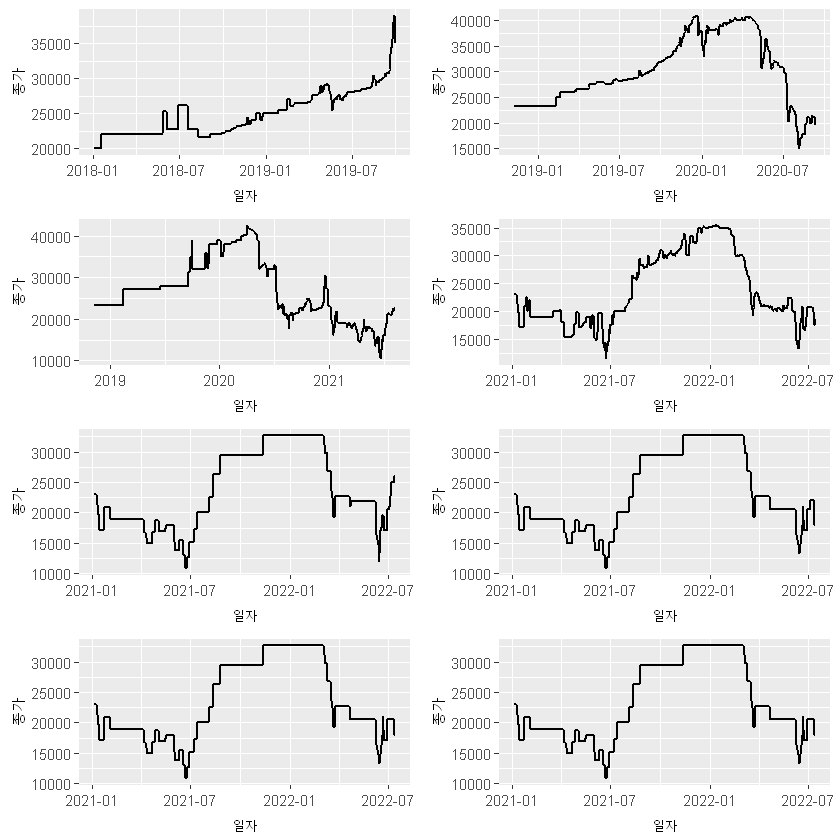

In [34]:
grid.arrange(az,bz,cz,dz,ez,fz,gz,hz, nrow = 4, ncol = 2)

In [35]:
aa <- ggplot(data = tra_18, aes(x=일자, y=거래량))+geom_line(cex = 0.8)
ba <- ggplot(data = tra_19, aes(x=일자, y=거래량))+geom_line(cex = 0.8)
ca <- ggplot(data = tra_20, aes(x=일자, y=거래량))+geom_line(cex = 0.8)
da <- ggplot(data = tra_21, aes(x=일자, y=거래량))+geom_line(cex = 0.8)
ea <- ggplot(data = tra_22, aes(x=일자, y=거래량))+geom_line(cex = 0.8)
fa <- ggplot(data = tra_23, aes(x=일자, y=거래량))+geom_line(cex = 0.8)
ga <- ggplot(data = tra_24, aes(x=일자, y=거래량))+geom_line(cex = 0.8)
ha <- ggplot(data = tra_25, aes(x=일자, y=거래량))+geom_line(cex = 0.8)

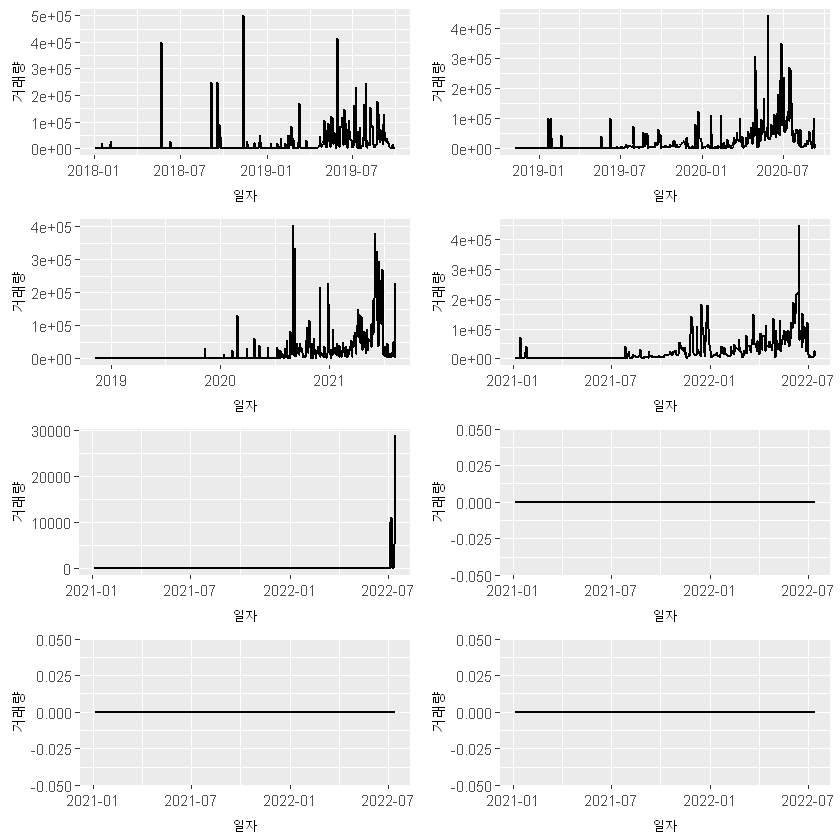

In [36]:
grid.arrange(aa,ba,ca,da,ea,fa,ga,ha, nrow = 4, ncol = 2)

In [37]:
write.csv(tra_18, file = "KAU18.csv")
write.csv(tra_19, file = "KAU19.csv")
write.csv(tra_20, file = "KAU20.csv")
write.csv(tra_21, file = "KAU21.csv")
write.csv(tra_22, file = "KAU22.csv")

***
### The codes above are written in R.  
### The codes belwo are written in Python.
***

# Chapter 3. Data preprocessing and visualization

# Load packages

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import seaborn as sns
import missingno as msno
import warnings

from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# Configuration

In [3]:
# Korean font
from matplotlib import font_manager, rc
try:
    font_path = "C:/Windows/Fonts/malgun.TTF"
    Kfont = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=Kfont)
except:
    pass

# Fix minus presentation
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
# Ignore warings
warnings.filterwarnings('ignore')

# Custom functions

In [5]:
def to_date_inv(df):
    try:
        df["날짜"] = pd.to_datetime(df["날짜"], format = "%Y년 %m월 %d일")
        df = df.sort_values(by = "날짜", ascending=True)
        df.set_index("날짜", inplace=True)
    except:
        df['일자'] = pd.to_datetime(df['일자'], format='')
        df = df.sort_values(by = "일자", ascending=True)
        df = df.rename(columns={'일자': '날짜'})
        df.set_index("날짜", inplace=True)

    return df

def to_numeric_inv(df):
    try:
        df["종가"] = df["종가"].replace(",", "")
        df["종가"] = pd.to_numeric(df["종가"])
    except:
        df["종가"] = df["종가"].str.replace(",", "")
        df["종가"] = pd.to_numeric(df["종가"])

    return df

def dtype_chg(df: pd.DataFrame) -> pd.DataFrame:
    return to_date_inv(to_numeric_inv(df))

# Load data

In [6]:
# Get carbon credit data
path_kau19 = 'data/external_data/KAU19-22/KAU19.csv'
path_kau20 = 'data/external_data/KAU19-22/KAU20.csv'

# Get data path from local directory
path_brent_crude_future = 'data/external_data/Features/브렌트유 선물 내역.csv'
path_natural_gas = 'data/external_data/Features/천연가스 선물 내역.csv'
path_iron = 'data/external_data/Features/철광석 내역.csv'
path_coal_future = 'data/external_data/Features/Newcastle Coal Futures 내역.csv'
path_usd_krw = 'data/external_data/Features/USD_KRW 내역.csv'
path_wti_crude_future = 'data/external_data/Features/WTI유 선물 내역.csv'

In [7]:
# Load carbon credit dataset
df_kau19 = pd.read_csv(path_kau19, encoding='euc-kr', index_col=0)
df_kau20 = pd.read_csv(path_kau20, encoding='euc-kr', index_col=0)

# Load dataset
df_brent_crude_fut = pd.read_csv(path_brent_crude_future).dropna()
df_natural_gas = pd.read_csv(path_natural_gas).dropna()
df_iron = pd.read_csv(path_iron, encoding='utf-8').dropna()
df_coal_fut = pd.read_csv(path_coal_future, encoding='utf-8').dropna()
df_usd_krw = pd.read_csv(path_usd_krw).dropna()
df_wti_crude_fut = pd.read_csv(path_wti_crude_future).dropna()

In [8]:
# Check KAU data set
df_kau19

,일자,종목명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
1,2019-01-02,KAU19,"23,200",0,0.00,0,0,0,0,0,0
2,2019-01-03,KAU19,"23,200",0,0.00,0,0,0,0,0,0
3,2019-01-04,KAU19,"23,200",0,0.00,0,0,0,0,0,0
4,2019-01-07,KAU19,"23,200",0,0.00,0,0,0,0,0,0
5,2019-01-08,KAU19,"23,200",0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
417,2020-09-07,KAU19,"21,000",0,0.00,0,0,0,"100,680","2,114,280,000","21,000"
418,2020-09-08,KAU19,"21,250",250,1.19,0,0,0,0,0,0
419,2020-09-09,KAU19,"21,250",0,0.00,"20,000","21,500","20,000","15,604","320,217,800","20,522"
420,2020-09-10,KAU19,"20,850",-400,-1.88,"21,000","21,000","20,850","1,424","29,900,550","20,998"


In [9]:
# Check brent crude oil future data
df_brent_crude_fut

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 07월 18일,105.48,100.70,106.27,99.47,-,4.62%
1,2022년 07월 17일,100.82,101.26,101.26,100.70,-,-0.17%
2,2022년 07월 15일,100.99,100.02,102.59,98.23,-,1.32%
3,2022년 07월 14일,99.67,99.28,100.38,94.52,-,-0.08%
4,2022년 07월 13일,99.75,98.56,101.21,98.28,-,0.64%
...,...,...,...,...,...,...,...
914,2019년 01월 08일,58.72,57.64,58.87,57.13,288.25K,2.42%
915,2019년 01월 07일,57.33,57.41,58.93,57.26,296.58K,0.47%
916,2019년 01월 04일,57.06,55.67,58.31,55.34,321.11K,1.98%
917,2019년 01월 03일,55.95,54.29,56.30,53.93,278.36K,1.89%


# Preprocessing & Visualization

In [10]:
# Simple dtype change : date to datetime & Close price comma fix
df_kau19 = dtype_chg(df_kau19)
df_kau20 = dtype_chg(df_kau20)

df_brent_crude_fut = dtype_chg(df_brent_crude_fut)
df_natural_gas = dtype_chg(df_natural_gas)
df_iron = dtype_chg(df_iron)
df_coal_fut = dtype_chg(df_coal_fut)
df_usd_krw = dtype_chg(df_usd_krw)
df_wti_crude_fut = dtype_chg(df_wti_crude_fut)

In [11]:
# Concat close price of all time series data
df_tot = pd.concat(
    [
        df_kau19['종가'],
        df_kau20['종가'],
        df_brent_crude_fut['종가'],
        df_natural_gas['종가'],
        df_iron['종가'],
        df_coal_fut['종가'],
        df_usd_krw['종가'],
        df_wti_crude_fut['종가'],
],
axis=1)

tot_col_nm = [
        'kau19',
        'kau20',
        'brent_crude_fut',
        'natural_gas',
        'iron',
        'coal_fut',
        'usd_krw',
        'wti_crude_fut',
    ]

df_tot.columns = tot_col_nm

df_tot.head()
df_kau19.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03',
               '2020-09-04', '2020-09-07', '2020-09-08', '2020-09-09',
               '2020-09-10', '2020-09-11'],
              dtype='datetime64[ns]', name='날짜', length=421, freq=None)

In [12]:
# Split total DataFrame by KAU
df_19 = df_tot.drop(columns=['kau20'])
df_20 = df_tot.drop(columns=['kau19'])

In [13]:
# Weekly temporal smoothing
df_19 = df_19.resample('w').mean()
df_20 = df_20.resample('w').mean()

In [14]:
# Assign temporal restricition
df_19 = df_19[(df_19.index > pd.Timestamp('2018-12-31')) & (df_19.index < pd.Timestamp('2021-01-01'))]
df_20 = df_20[(df_20.index > pd.Timestamp('2019-12-31')) & (df_20.index < pd.Timestamp('2022-01-01'))]

In [15]:
# Check temporal restriction and smoothing
df_20

,kau20,brent_crude_fut,natural_gas,iron,coal_fut,usd_krw,wti_crude_fut
날짜,,,,,,,
2020-01-05,39000.0,67.3225,2.1612,92.2600,67.70,1157.472,61.660000
2020-01-12,35050.0,66.5940,2.1612,93.8640,68.27,1162.636,60.836000
2020-01-19,37010.0,64.4320,2.0790,94.5620,70.80,1157.846,58.408333
2020-01-26,38000.0,63.1460,1.9114,94.5775,69.01,1166.024,56.718000
2020-02-02,38000.0,59.0180,1.8766,93.2580,68.64,1182.740,52.730000
...,...,...,...,...,...,...,...
2021-11-28,NaN,79.8400,5.0716,94.0375,157.10,1190.504,75.840000
2021-12-05,NaN,70.4860,4.3734,99.2320,156.50,1181.614,66.892000
2021-12-12,NaN,74.7820,3.7838,106.0080,157.58,1178.294,71.302000


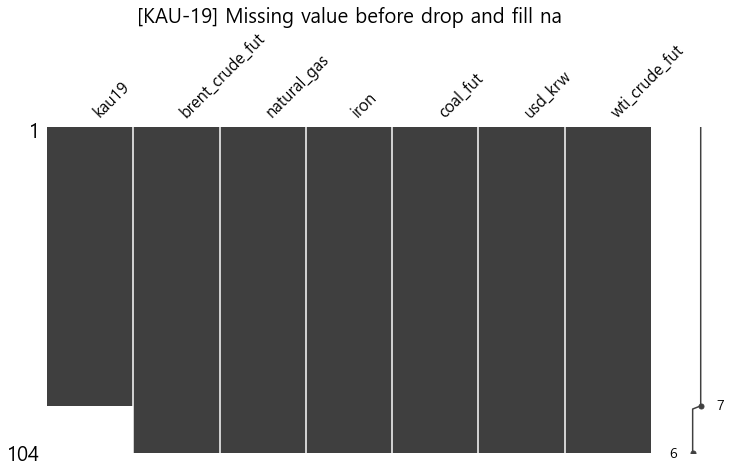

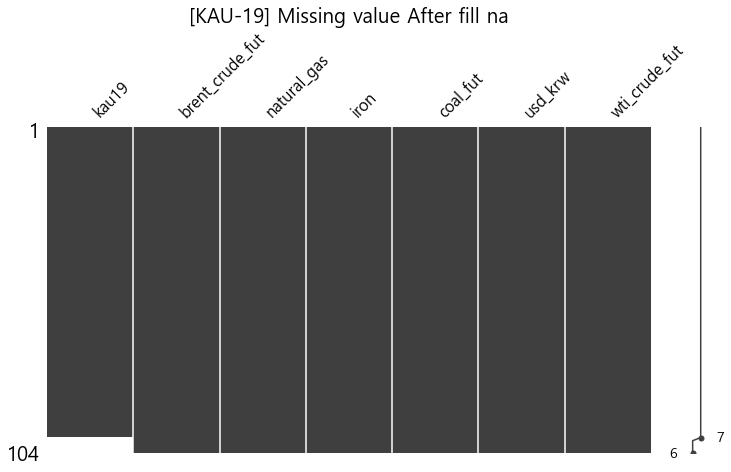

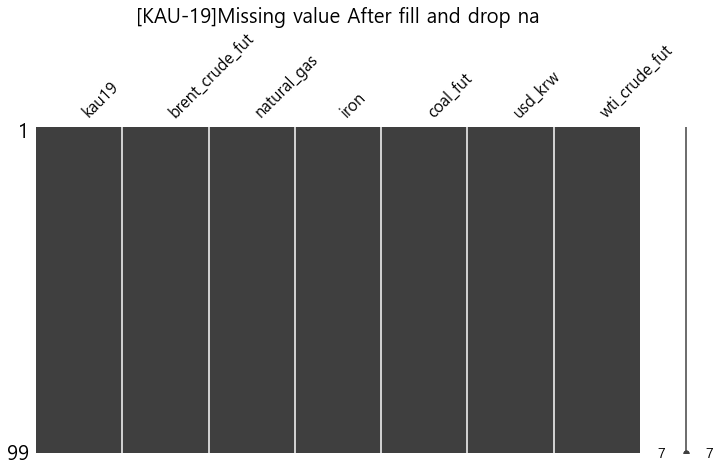

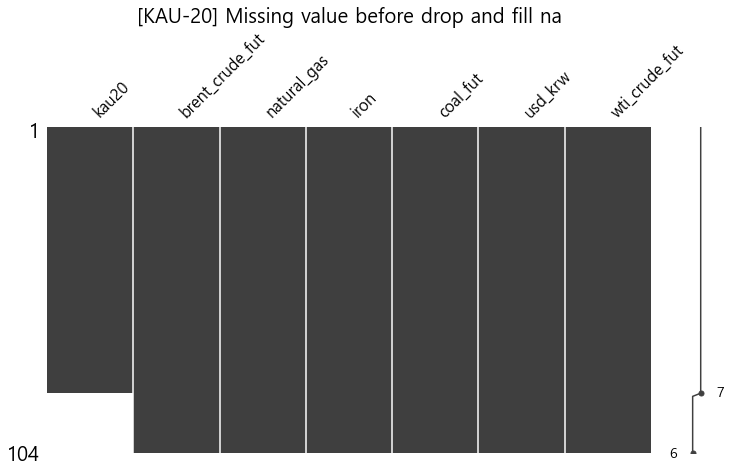

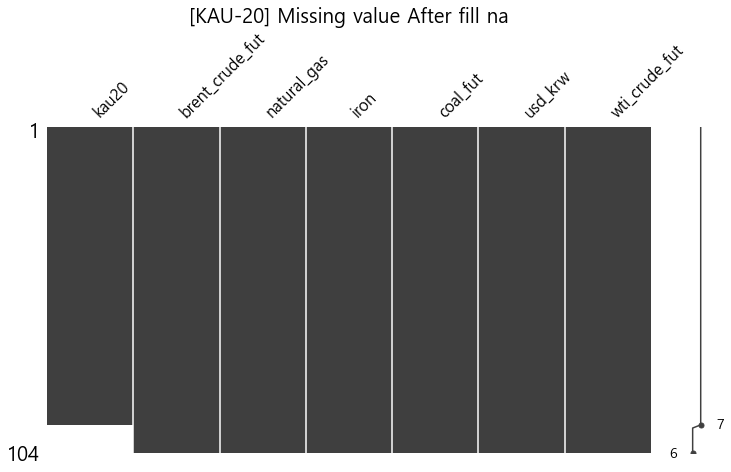

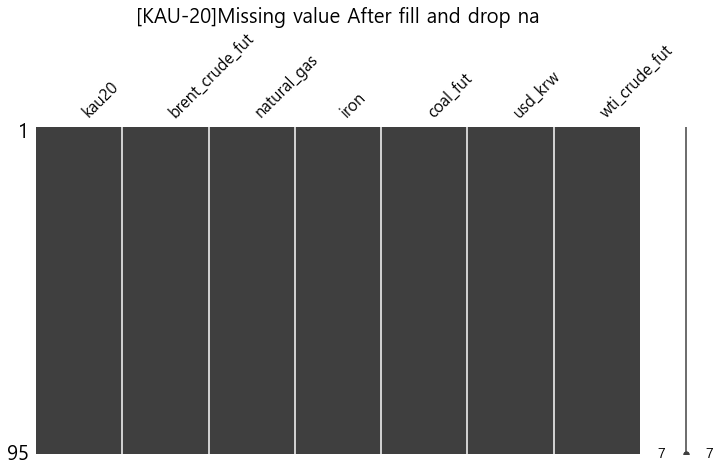

In [16]:
# Check missing value of each column and drop missing
def fill_missing_and_visualize(df: pd.DataFrame, df_nm=None, visualize=True) -> pd.DataFrame:
    df_fill = df.interpolate(limit_are='outside', limit=10)
    df_fill_n_drop = df_fill.dropna()

    if visualize:
        ax_raw = msno.matrix(df, figsize=(12, 6))
        ax_raw.set_title(f'[{df_nm}] Missing value before drop and fill na', fontsize=20)

        ax_fill = msno.matrix(df_fill, figsize=(12, 6))
        ax_fill.set_title(f'[{df_nm}] Missing value After fill na', fontsize=20)

        ax_fill_n_drop = msno.matrix(df_fill_n_drop, figsize=(12, 6))
        ax_fill_n_drop.set_title(f'[{df_nm}]Missing value After fill and drop na', fontsize=20)

    return df_fill_n_drop

df_19 = fill_missing_and_visualize(df_19, 'KAU-19')
df_20 = fill_missing_and_visualize(df_20, 'KAU-20')

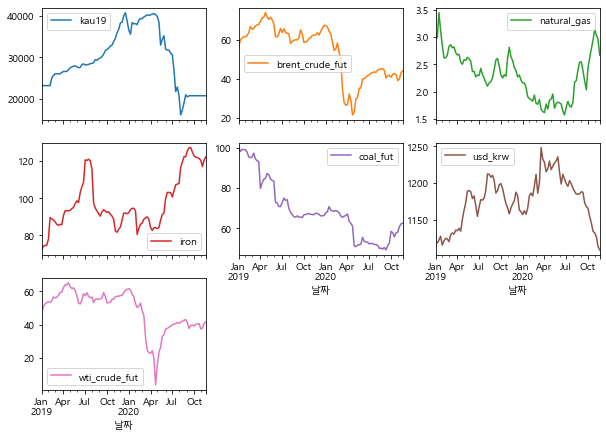

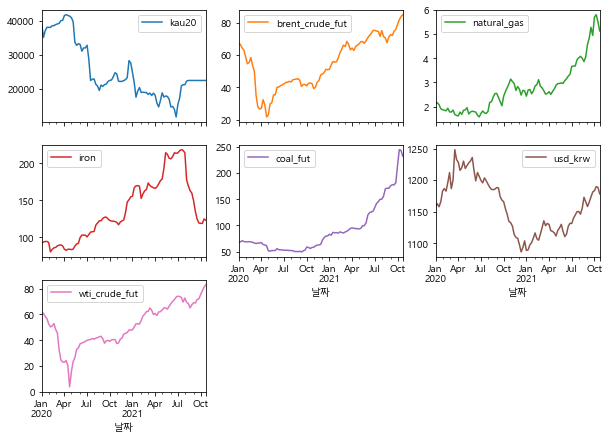

In [17]:
# plot - Check data by simple line plot
def viz_line_by_col(df):
    num_col = len(df.columns)

    df.plot(
        subplots=True, 
        layout=(int(np.ceil(num_col*2/3)), int(np.ceil(num_col*1/3))),
        figsize=(2*int(np.ceil(num_col*2/3)), 4*int(np.ceil(num_col*1/3))),
        )

for df in [df_19, df_20]:
    viz_line_by_col(df)

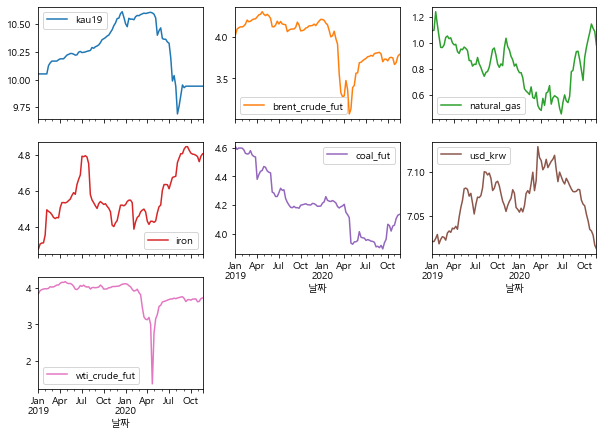

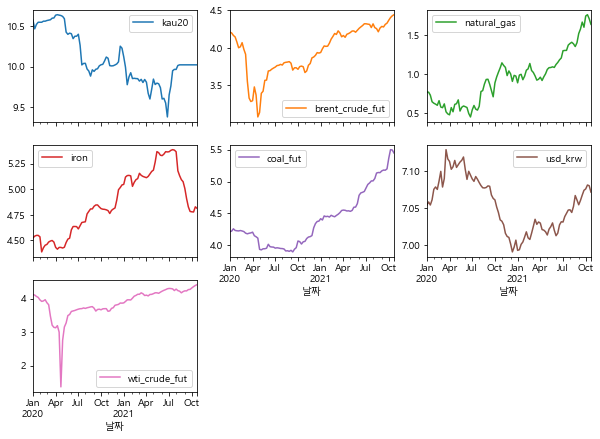

In [18]:
# plot - Log transformation for scaling and visualization
def log_transform_n_viz(df, visualize=True):
    df_log_transformed = df.applymap(np.log)
    num_col = len(df_log_transformed.columns)

    if visualize:
        df_log_transformed.plot(
        subplots=True, 
        layout=(int(np.ceil(num_col*2/3)), int(np.ceil(num_col*1/3))),
        figsize=(2*int(np.ceil(num_col*2/3)), 4*int(np.ceil(num_col*1/3))),
        )
    
    return df_log_transformed

df_19 = log_transform_n_viz(df_19)
df_20 = log_transform_n_viz(df_20)

findfont: Font family ['bold'] not found. Falling back to DejaVu Sans.


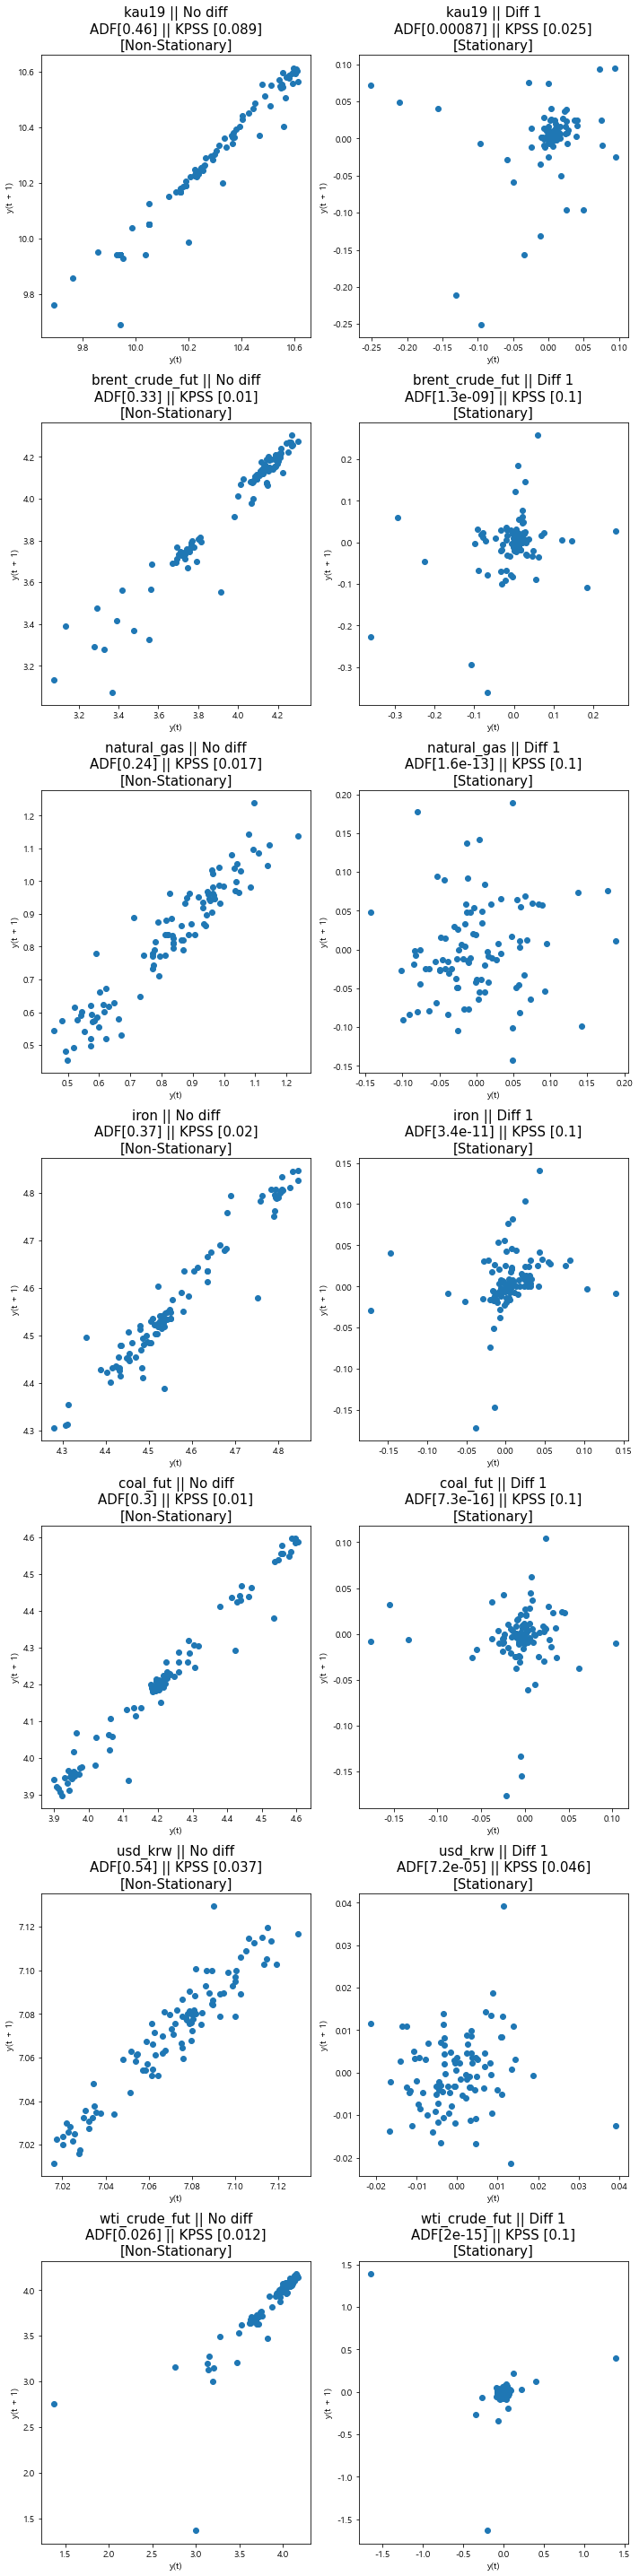

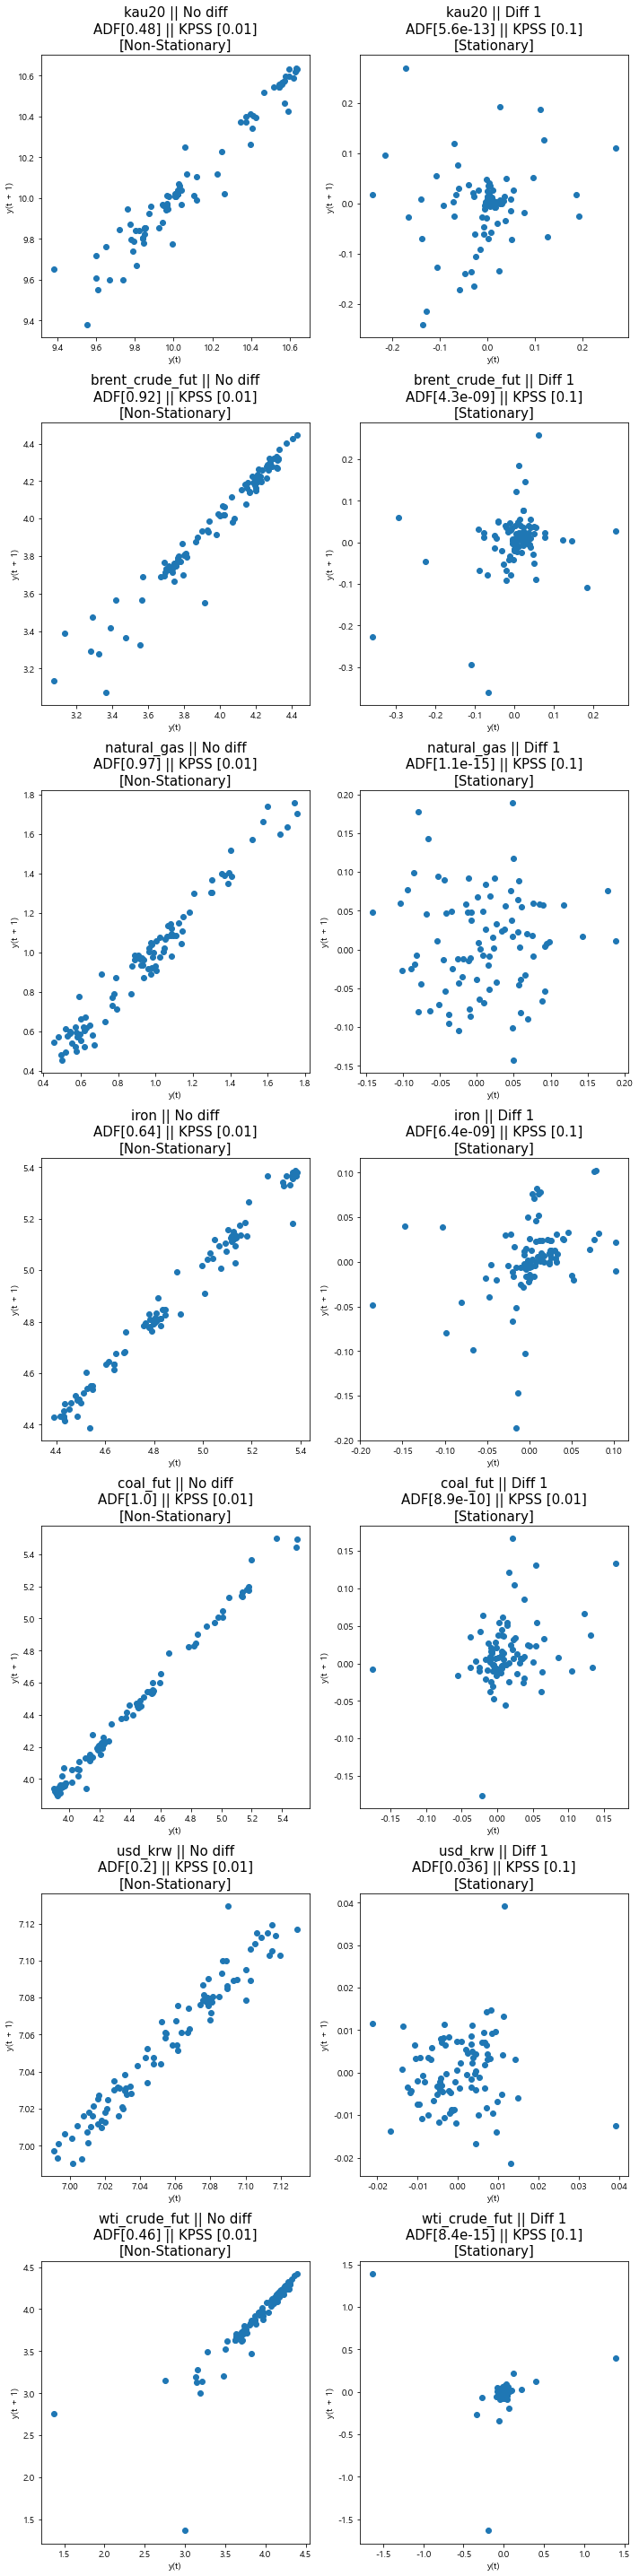

In [19]:
# plot - visualize each time series data by lab plot and stationarity test
def viz_stationarity_check(df:pd.DataFrame):
    fig_lag_plot, ax_lag_plot = plt.subplots(len(df.columns), 2, figsize=(10, 5*len(tot_col_nm)))

    for idx, col_nm in enumerate(df.columns):
        
        pd.plotting.lag_plot(df[col_nm].dropna(), ax=ax_lag_plot[idx, 0])
        r_adf = adfuller(df[col_nm].dropna())
        r_kpss = kpss(df[col_nm].dropna())
        if any([r_adf[1] >= 0.05, r_kpss[1] < 0.05]):
            diff0_stationarity = 'Non-Stationary'
        else:
            diff0_stationarity = 'Stationary'
        ax_lag_plot[idx, 0].set_title(
            f'{col_nm} || No diff\nADF[{r_adf[1]:.2}] || KPSS [{r_kpss[1]:.2}]\n[{diff0_stationarity}]',
        fontsize=15, family='bold')

        pd.plotting.lag_plot(df[col_nm].diff().dropna(), ax=ax_lag_plot[idx, 1])
        r_adf = adfuller(df[col_nm].diff().dropna())
        r_kpss = kpss(df[col_nm].diff().dropna())
        if any([r_adf[1] < 0.05, r_kpss[1] >= 0.05]):
            diff1_stationarity = 'Stationary'
        else:
            diff1_stationarity = 'Non-Stationary'
        ax_lag_plot[idx, 1].set_title(
            f'{col_nm} || Diff 1\nADF[{r_adf[1]:.2}] || KPSS [{r_kpss[1]:.2}]\n[{diff1_stationarity}]', 
        fontsize=15, family='bold')

    fig_lag_plot.tight_layout()

for df in [df_19, df_20]:
    viz_stationarity_check(df)

In [20]:
# Difference total DataFrame
df_19 = df_19.diff().dropna()
df_20 = df_20.diff().dropna()

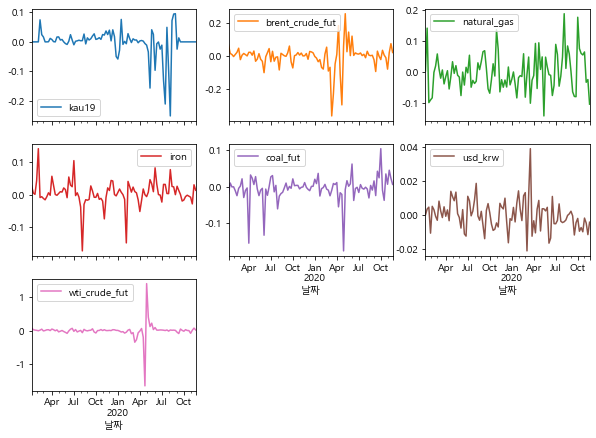

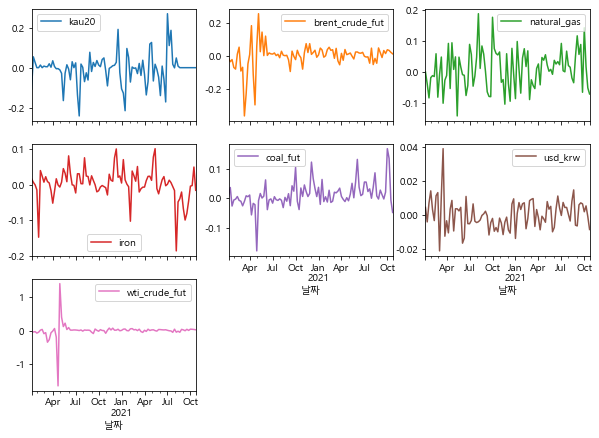

In [21]:
# plot - Check data by simple line plot
for df in [df_19, df_20]:
    viz_line_by_col(df)

# Save preprocessed data 

In [22]:
dfs = [df_19, df_20]
df_nms = ['kau19', 'kau20']

for df, df_nm in zip(dfs, df_nms):
    df.to_csv(f'data/preprocessed/{df_nm}.csv')

# Chapter 4. Analysis and visualization with VAR & Granger Causality Model

# Load packages

In [23]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import yfinance as yf
import seaborn as sns
import warnings

from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR

# Configuration

In [24]:
# Korean font
from matplotlib import font_manager, rc
try:
    font_path = "C:/Windows/Fonts/malgun.TTF"
    Kfont = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=Kfont)
except:
    pass

# Fix minus presentation
mpl.rcParams['axes.unicode_minus'] = False

In [25]:
# Fix random seed
def fix_random_seed(seed=42):
    import random
    import numpy as np 
    import os

    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    
fix_random_seed()

# Load preprocessed data

In [26]:
df_list = []
yr_list = [19, 20]

for yr in yr_list:
    df = pd.read_csv(f'data/preprocessed/kau{str(yr)}.csv')
    df.rename(columns={'날짜': 'date'}, inplace=True)
    df.set_index('date', inplace=True)
    df.index = df.index.astype('datetime64[ns]')
    df_list.append(df)

df_19, df_20 = df_list

In [27]:
# Divide kau19 and kau20 by year
df_19_pre = df_19[
    (df_19.index > pd.Timestamp('2018-12-31')) & (df_19.index < pd.Timestamp('2020-01-01'))
    ].rename(columns={'kau19':'kau19_19'})
df_19_post = df_19[
    (df_19.index > pd.Timestamp('2019-12-31')) & (df_19.index < pd.Timestamp('2021-01-01'))
    ].rename(columns={'kau19':'kau19_20'})
df_20_pre = df_20[
    (df_20.index > pd.Timestamp('2019-12-31')) & (df_20.index < pd.Timestamp('2021-01-01'))
    ].rename(columns={'kau20':'kau20_20'})
df_20_post = df_20[
    (df_20.index > pd.Timestamp('2020-12-31')) & (df_20.index < pd.Timestamp('2022-01-01'))
    ].rename(columns={'kau20':'kau20_21'})

In [28]:
# Simple check df kau 19
df_19_post

,kau19_20,brent_crude_fut,natural_gas,iron,coal_fut,usd_krw,wti_crude_fut
date,,,,,,,
2020-01-05,-0.058127,-0.001410,-0.024498,0.006688,0.020331,-0.003142,0.006770
2020-01-12,-0.028022,-0.010880,0.000000,0.017236,0.008384,0.004452,-0.013454
2020-01-19,0.076096,-0.033004,-0.038777,0.007409,0.036389,-0.004128,-0.040723
2020-01-26,-0.008511,-0.020161,-0.084051,0.000164,-0.025608,0.007038,-0.029367
2020-02-02,0.001642,-0.067607,-0.018374,-0.014050,-0.005376,0.014234,-0.072907
2020-02-09,-0.006255,-0.077479,-0.011900,-0.147262,-0.002480,0.003218,-0.046226
2020-02-16,0.027877,0.013241,-0.014795,0.040516,0.006260,-0.003341,0.014532
2020-02-23,0.010988,0.054909,0.058993,0.024851,-0.006699,0.011326,0.035668
2020-03-01,-0.002290,-0.089281,-0.081669,0.007825,-0.009543,0.013196,-0.090031


In [29]:
# Simple check df kau 20
df_20

,kau20,brent_crude_fut,natural_gas,iron,coal_fut,usd_krw,wti_crude_fut
date,,,,,,,
2020-01-12,-0.106786,-0.010880,0.000000,0.017236,0.008384,0.004452,-0.013454
2020-01-19,0.054413,-0.033004,-0.038777,0.007409,0.036389,-0.004128,-0.040723
2020-01-26,0.026398,-0.020161,-0.084051,0.000164,-0.025608,0.007038,-0.029367
2020-02-02,0.000000,-0.067607,-0.018374,-0.014050,-0.005376,0.014234,-0.072907
2020-02-09,0.000000,-0.077479,-0.011900,-0.147262,-0.002480,0.003218,-0.046226
...,...,...,...,...,...,...,...
2021-09-26,0.000000,0.016539,-0.065775,-0.045156,0.021164,0.006544,0.006291
2021-10-03,0.000000,0.039367,0.143006,-0.003472,0.166608,0.001878,0.043761
2021-10-10,0.000000,0.035264,0.016868,-0.001648,0.133812,0.005342,0.039453


# Analysis with VAR and Granger Causality model

In [30]:
def var_analysis(df:pd.DataFrame, var_max_lag:int=5, print_summary=False, visualize=False,
auto_lag_select=False):
    mdl_var = VAR(df)
    
    while True:
        try:
            best_lag_analysis = mdl_var.select_order(var_max_lag)
            break
        except:
            var_max_lag += -1
        
    if auto_lag_select:
        if best_lag_analysis.selected_orders['aic'] == 0:
            best_lag = var_max_lag
        else:
            best_lag = best_lag_analysis.selected_orders['aic']
    else:
        best_lag = var_max_lag

    rslt_var = mdl_var.fit(best_lag)
    if print_summary:
        print(rslt_var.summary())

    var_pval_tf_mat = rslt_var.pvalues.applymap(lambda x: True if x < 0.05 else False)

    # plot - VAR model coefficients p-value
    if visualize:
        fig_var_pval, ax_var_pval = plt.subplots(1, 1, figsize=(max(4*best_lag, 8), max(6*best_lag, 12)))

        heat_pval = sns.heatmap(
            var_pval_tf_mat, 
            square=True, 
            ax=ax_var_pval, 
            annot=True,
            annot_kws={'fontsize':15-best_lag}, 
            cbar=False,
            linecolor='grey',
            linewidth=0.1,
            )
        heat_pval.set_xticklabels(heat_pval.get_xticklabels(), fontsize=12)
        heat_pval.set_yticklabels(heat_pval.get_yticklabels(), fontsize=12)
        ax_var_pval.set_title(
            'Statistical significances of VAR coefficients by p-values', 
            fontsize=15, weight='bold')

        fig_var_pval.tight_layout()

    return rslt_var, var_pval_tf_mat

# rslt, tf_mat = var_analysis(df_20)

### <span style="color:#ffd33d">**Warning**</span>
> Granger causality test can only provide 'Granger Causality' not the causality   
Thus, it would be stretching a point to use Granger causality test as proof of general causality between two time series variables.

### **Granger Causality Test Structure**
|Model Category|Regression Formula|Coefficients|Walt Test|
|:---|---:|---:|---:|
|Restricted|$$y_t = c_1 + \sum_{i=1}^{p}\alpha_{1,i}\ y_{t-i} + \epsilon_{1, t},\\ where\ p\ is\ time\ lag$$|$$\beta_{1}=\beta_{2}=\beta_{3}=0$$|Null hypothesis|
|Unrestricted|$$y_t = c_2 + \sum_{i=1}^{p}\alpha_{2,i}\ y_{t-i} + \sum_{i=1}^{p}\beta_{i}\ x_{t-i} + \epsilon_{2, t},\\ where\ p\ is\ time\ lag$$|$$At\ least\ one\ of\\ \beta_{1},\ \beta_{2},\ \beta_{3}\ is\ not\ 0$$|Alternative hypothesis|
***

In [31]:
# Analyze causality between two time series variables with Granger Causality Test
def granger_analysis(df: pd.DataFrame, additional_component: list=None, print_analysis_result=False):
    """
    additional_component must be a shape of
    (feature x, feature y, time_lag)
    """
    # Get p-value significance matrix
    tf_mat = var_analysis(df, print_summary=False)[1]

    selc_granger_test = []
    main_col = tf_mat.columns[0]

    for sig_col_info in tf_mat[tf_mat[main_col]==True].index.to_list():
        if sig_col_info == 'const':
            continue
        lag, col = sig_col_info.split('.')
        lag = lag[1:]
        if col == main_col:
            continue # Ignore autocorrelation
        else:
            selc_granger_test.append((main_col, col, int(lag)))

    if print_analysis_result:
        verbose = 1
    else:
        verbose = 0
    
    # Granger Causality Test
    col_nms = list(set([x[0] for x in selc_granger_test]+[x[1] for x in selc_granger_test]))

    df_gct = pd.DataFrame(
        index=col_nms,
        columns=col_nms,
        dtype='object',
        )
    df_gct = df_gct.applymap(
        lambda x: pd.Series(index=np.arange(1, int(tf_mat.index[-1].split('.')[0][1:])+1), dtype='object'))
    df_gct.index.name='cause'
    df_gct.columns.name='effect'

    for factor_x, factor_y, time_lag in selc_granger_test:
        # factor x -> factor y
        if print_analysis_result:
            print(f'\n[{factor_x}][t-{time_lag}] -> [{factor_y}][t]', end='')
        df_gct.loc[factor_x, factor_y][time_lag] = grangercausalitytests(
            df[[factor_y, factor_x]],
            maxlag=[time_lag],
            verbose=verbose,
        )

        # factor y -> factor x
        if print_analysis_result:
            print(f'\n[{factor_y}][t-{time_lag}] -> [{factor_x}][t]', end='')
        df_gct.loc[factor_y, factor_x][time_lag] = grangercausalitytests(
            df[[factor_x, factor_y]],
            maxlag=[time_lag],
            verbose=verbose,
            )
    
    return df_gct

# granger_analysis(df_20_pre, print_analysis_result=False)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 22, Jul, 2022
Time:                     22:37:18
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -52.5205
Nobs:                     46.0000    HQIC:                  -58.7856
Log likelihood:           1233.48    FPE:                3.00820e-26
AIC:                     -62.5383    Det(Omega_mle):     5.25913e-28
--------------------------------------------------------------------
Results for equation kau19_19
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.015240         0.008564            1.780           0.075
L1.kau19_19               -0.071775         0.312258           -0.230           0.818
L1.brent_crude_fut         0.292168  

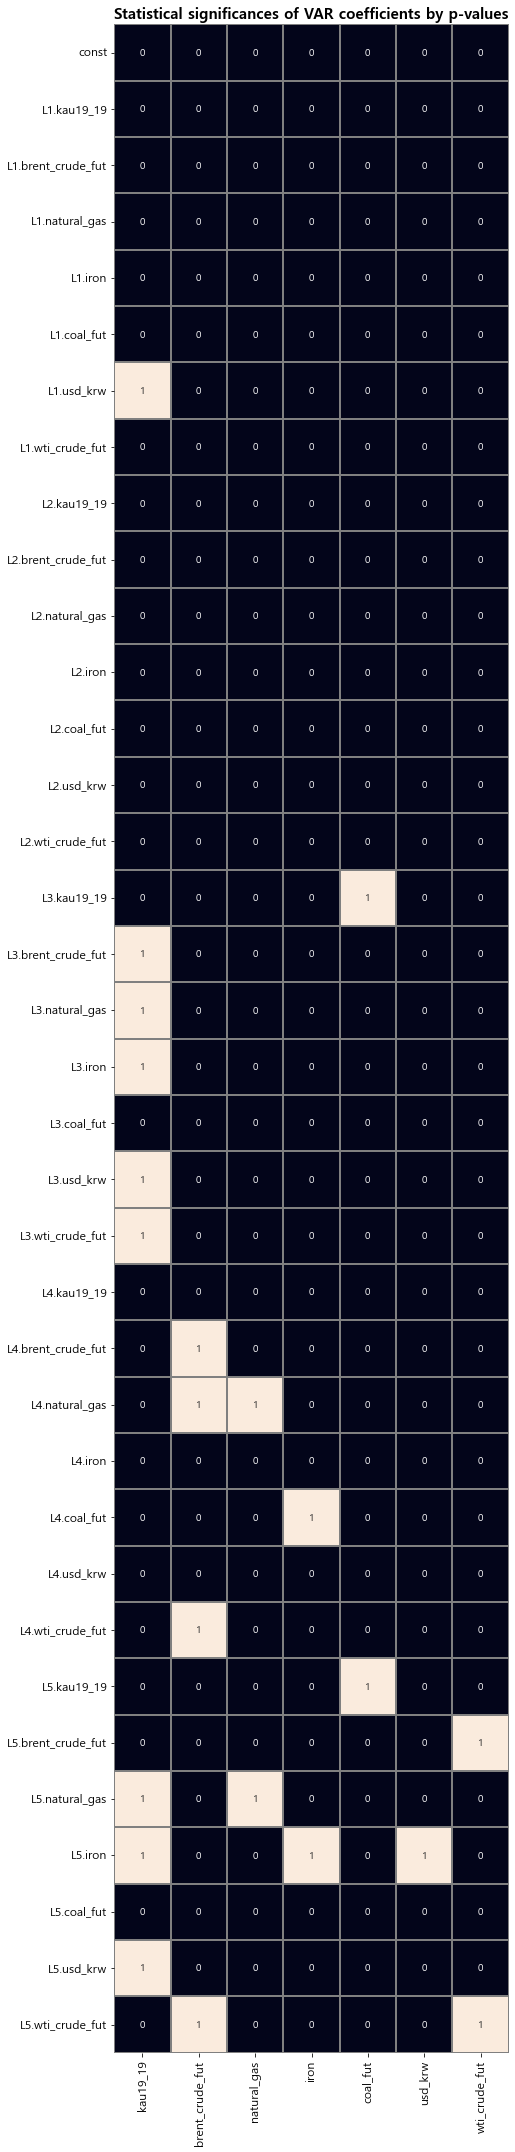

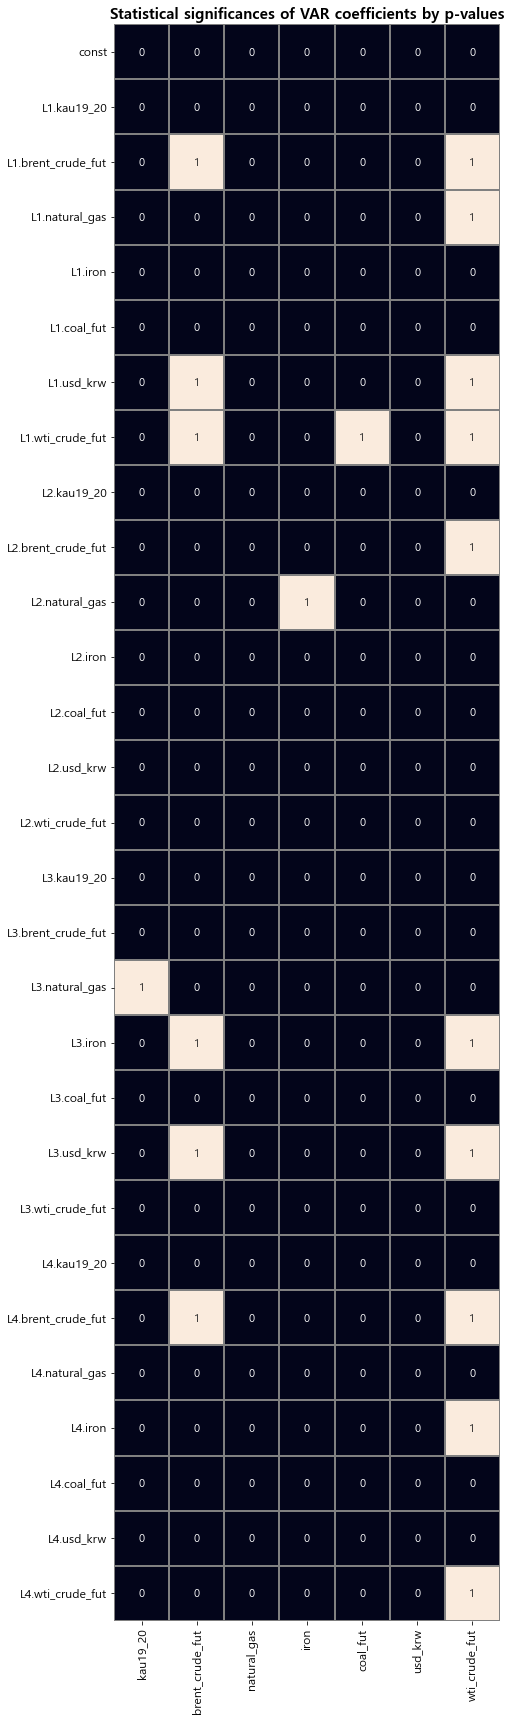

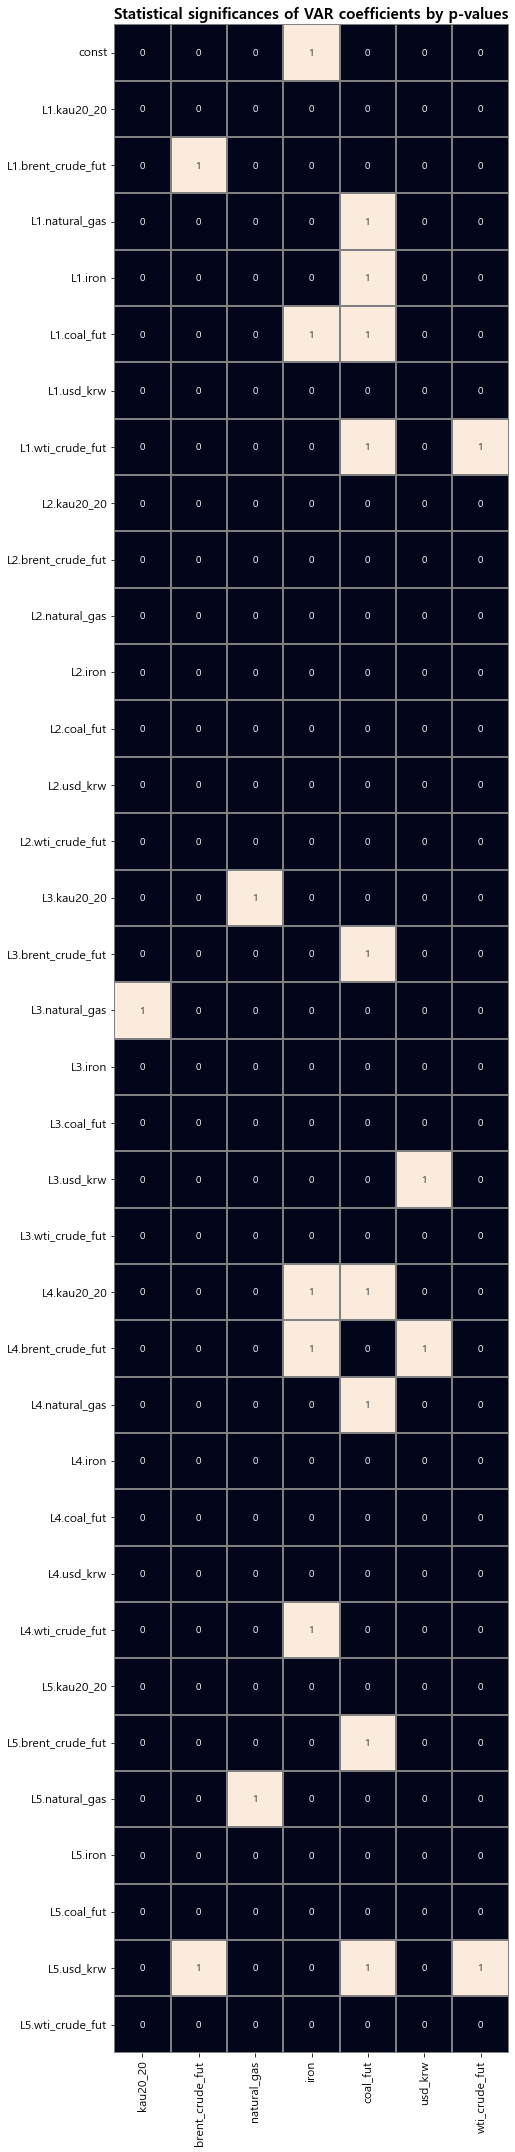

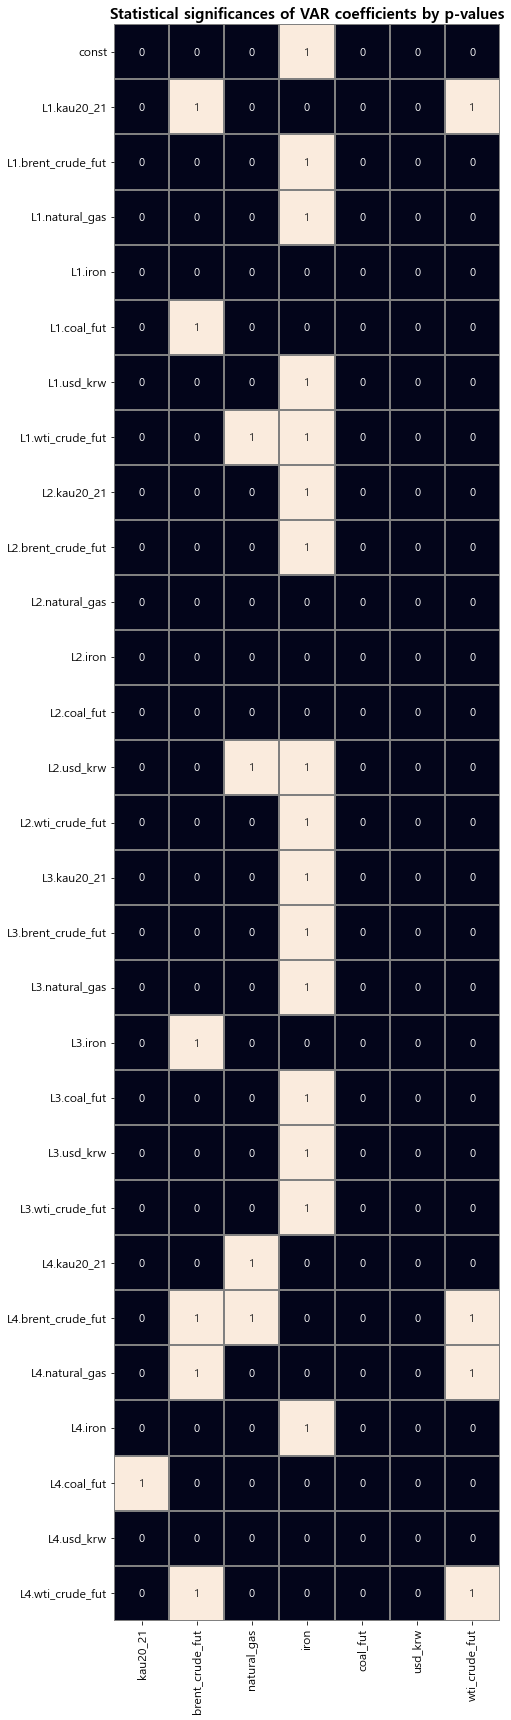

In [32]:
def var_n_granger(df, print_var_summary=False, viz_var_pval=False, print_granger_result=False):
    rslt_var, tf_mat = var_analysis(df, print_summary=print_var_summary, visualize=viz_var_pval)
    df_gct = granger_analysis(df, print_analysis_result=print_granger_result)

    return rslt_var, tf_mat, df_gct

for df in [df_19_pre, df_19_post, df_20_pre, df_20_post]:
    var_n_granger(df, print_var_summary=True, viz_var_pval=True, print_granger_result=True)